# Módulo 29: Introducción a clustering (Aprendizaje no supervisado)
- Se utilizará el modelo de clustering más conocido y utilizado - K-means
- El clustering es una técnica que nos permite agrupar un conjunto de datos con muchas variables diferentes
- Se habla de una técnica que permite automáticamente clasificar los registros de una base de datos sin una clasificación previamente dada. La idea es justamente descubrir grupos similares basados en todos los atributos de los registros que generan un índice de similaridad
- Aplicaciones de clustering:
    - Análisis de clientes
    - Detección de anomalías
    - Agrupamiento de resultados de búsqueda
    - Agrupaciones de comportamiento
    - Seguimiento de campañas de marketing

## Algoritmo K-Means
https://en.wikipedia.org/wiki/Cluster_analysis
- Es el algorítmo utilizaod para clustering
- Basado en Centroide. Es eficiente, efectivo y simple
- Es sensible al punto de aprtida inicial
- Funciona así:
    1. El analista debe selleccionar el número de clusters (n)
    2. En la iteración #1 se escogen n puntos (el número de clusters) random como los centroides del grupo
    3. Para cada punto de los datos, se asigna un centroide, según la distancia euclidiana
    4. Se re-calculan los centroides ahora utilizando los clusters definidos
    5. Se repiten los pasos 3 y 4 hasta que los centroides convergen en sus coordenadas (casi no se mueven)

## Gráfico de Elbow (Codo)
https://en.wikipedia.org/wiki/Elbow_method_(clustering)
- Es una heurística que permite definir el número de clusters
- En el eje x: número de clusters, en en el eje y una medida de variación llamada inercia que puede ser representada por el % de varianza
- Este % de varianza se va explicando menos y menos a medida que se sube el número de clusters. Cuanod se visualiza el "Codo" es cuando se tiene una respuesta sobre le óptimo de números de clusters
- Tener en cuenta que el primer cluster (k=1) va a explicar mucha varianza, para luego irla reduciendo
- Este gráfico permite medir la "inercia" y visualizar en qué punto ésta empieza a decrecer linealmente (el codo)
- Esto ayuda a que el analista pueda validar qué tan buena es la selección del número de clusters


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Librerías para clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, single, cophenet
from scipy.spatial.distance import pdist, squareform

In [73]:
headers =   ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

df = pd.read_csv('wine.csv', names=headers)
df.sample(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
3,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550
1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285


In [74]:
df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [75]:
df.shape

(178, 13)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: floa

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


#### Insights:
- Se tienen 178 filas
- No hay valores faltantes
- No existe una variable de predicción dado que el clustering no tiene un target que se quiera predecir
- No existe ninguna columna de ID que se deba eliminar

In [78]:
# Revisar la cantidad de ceros que existen en cada una de las columnas
df[df==0].count()

# df[df==0].count() / df.count()            # Esto nos lo daría en porcentaje

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [79]:
df.nunique()

Alcohol                         126
Malic acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

## Análisis de correlación y bivariado
### Correlación

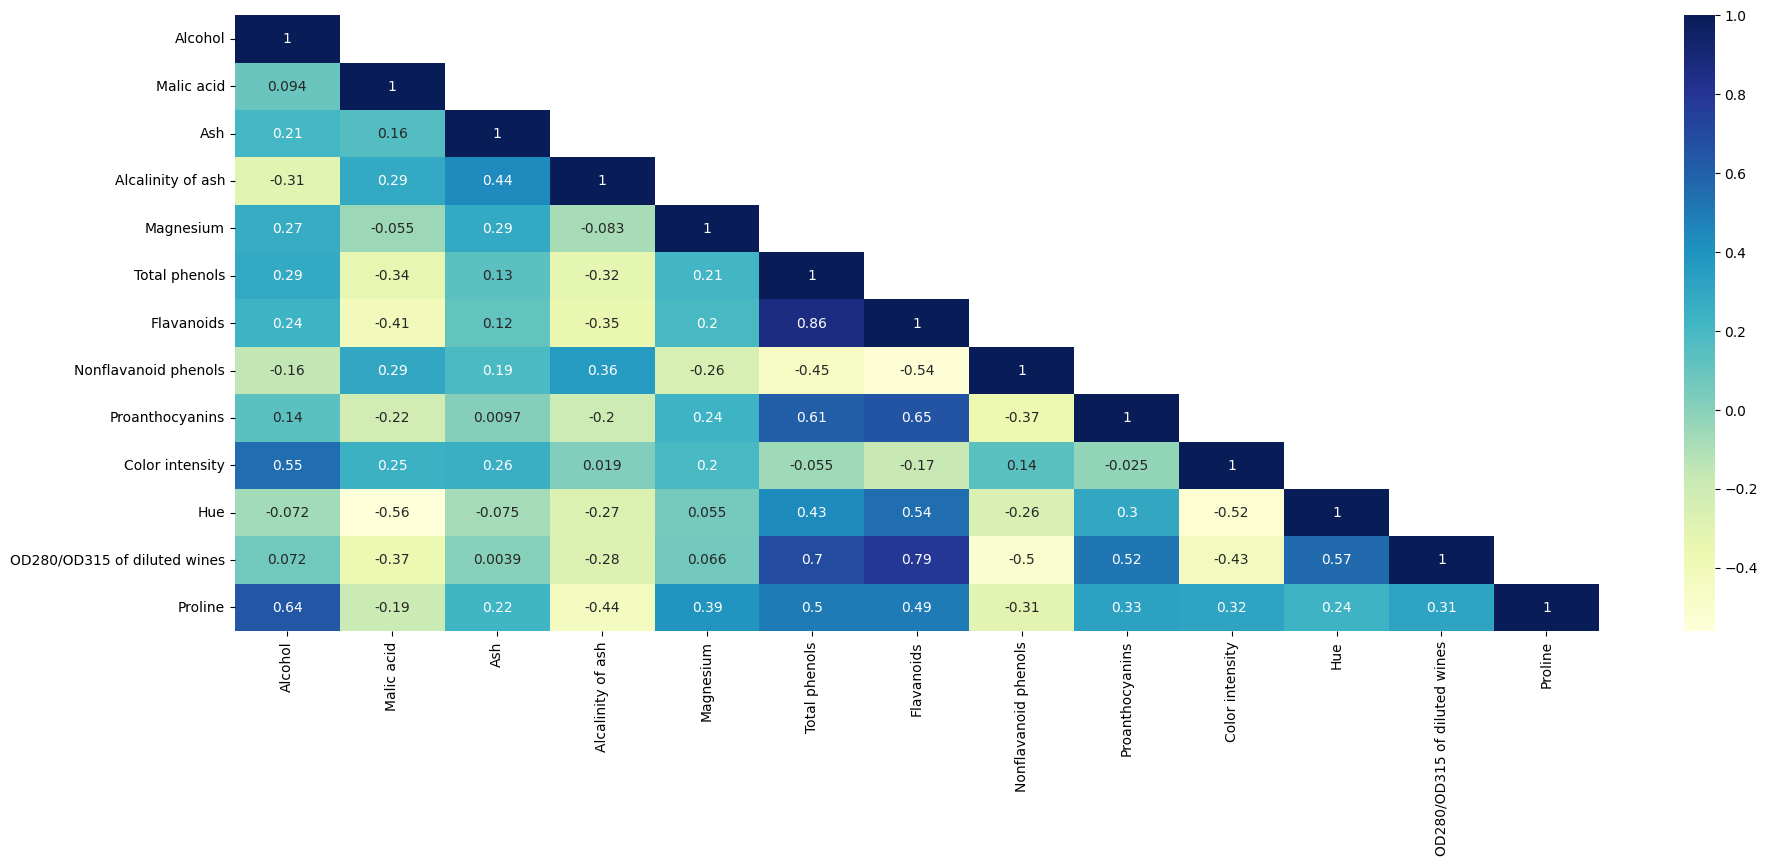

In [80]:
# Gráfica de correlación
plt.figure(figsize=(22,8))
corr_df  = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(data=df_lt, cmap='YlGnBu', annot=True)

Insights: 
- Se tiene una correlación alta entre: Flavanoids y OD280 y Flavanoids y Total_Phenos que, si bien es alta, no sobrepasa el 0.9
- Se podría estudiar si es que existen potenciales relaciones adicionales entre llos pero se ha definido el no hacerlo

In [81]:
# Gráfica de distribuciónpor columans numéricas
# Para escogerl as columnas numéricas 
numerics = ['int16', 'int32', 'int64', 'float64']
df.select_dtypes(include=numerics).sample(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [82]:
# Selección de columnas
cols_num = df.columns[[np.issubdtype(dt, np.number) for dt in df.dtypes]]
print(cols_num)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


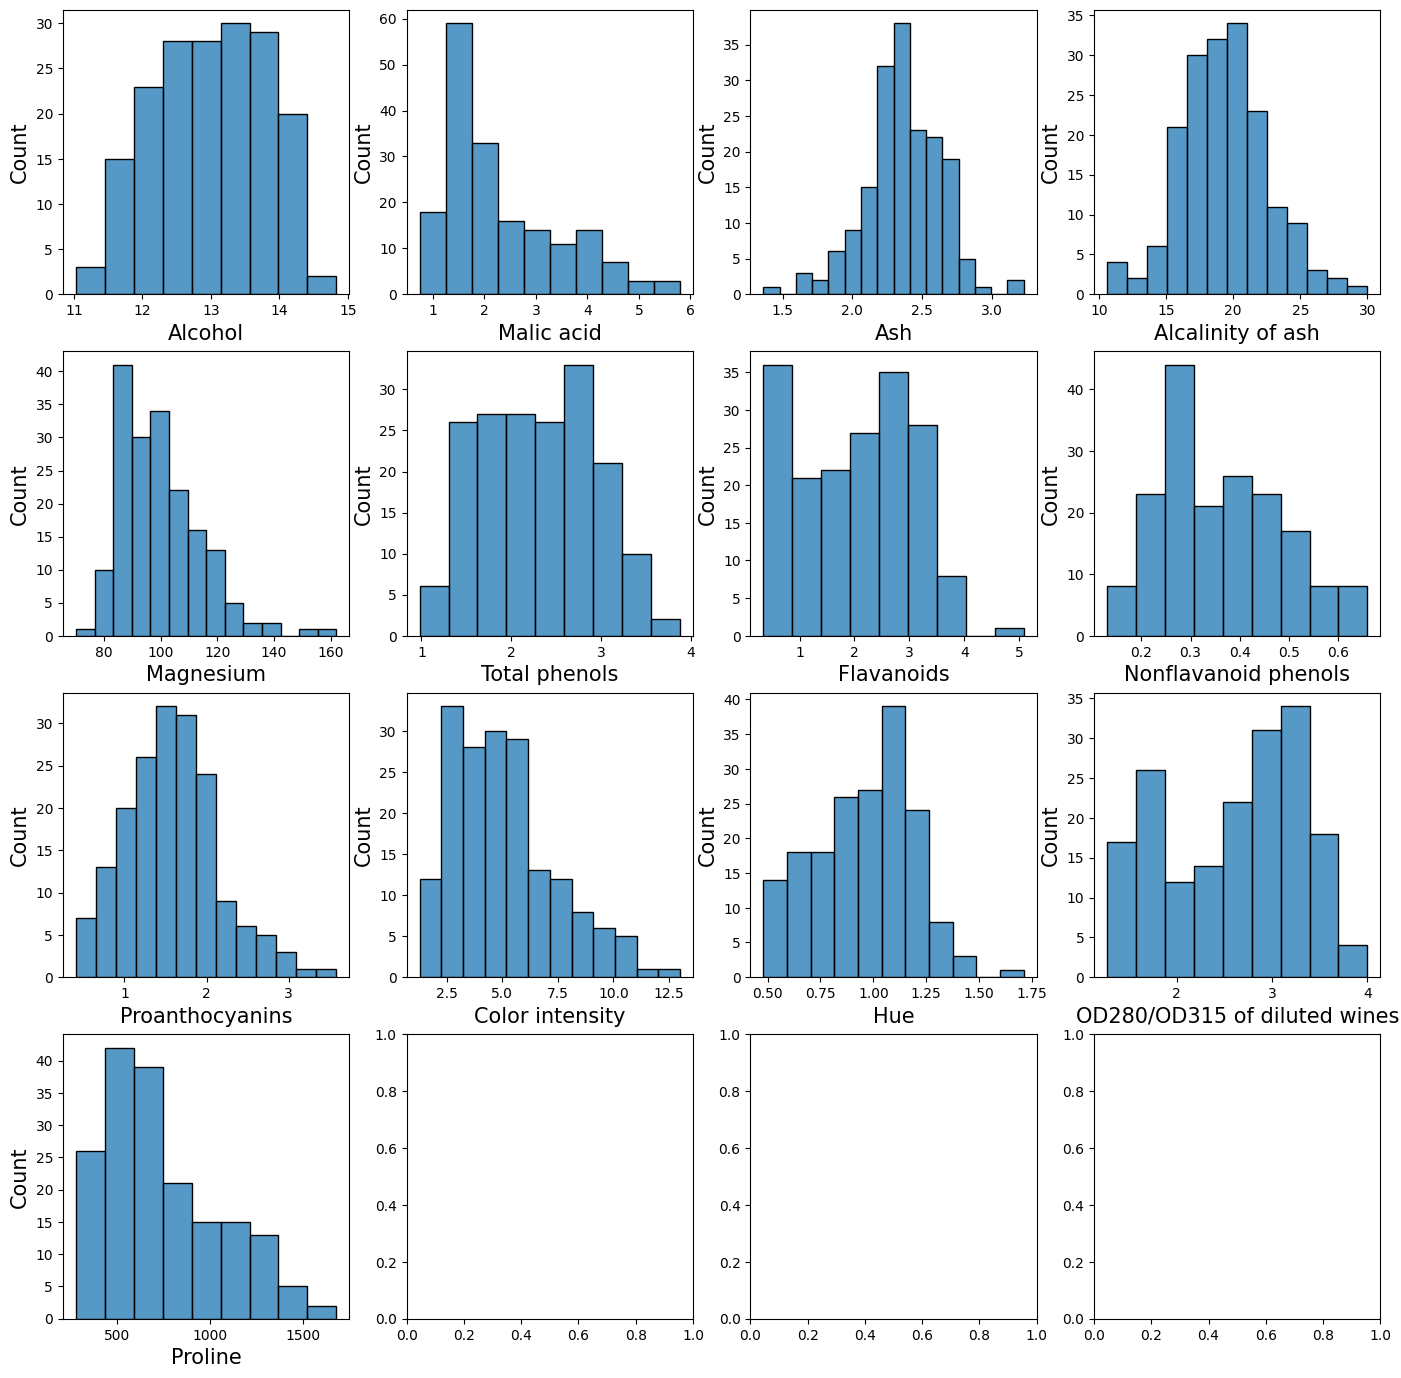

In [83]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(17,17))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=ax[i//4, i%4], kde=False)

Text(0.5, 1.0, 'Box-plot de Variables')

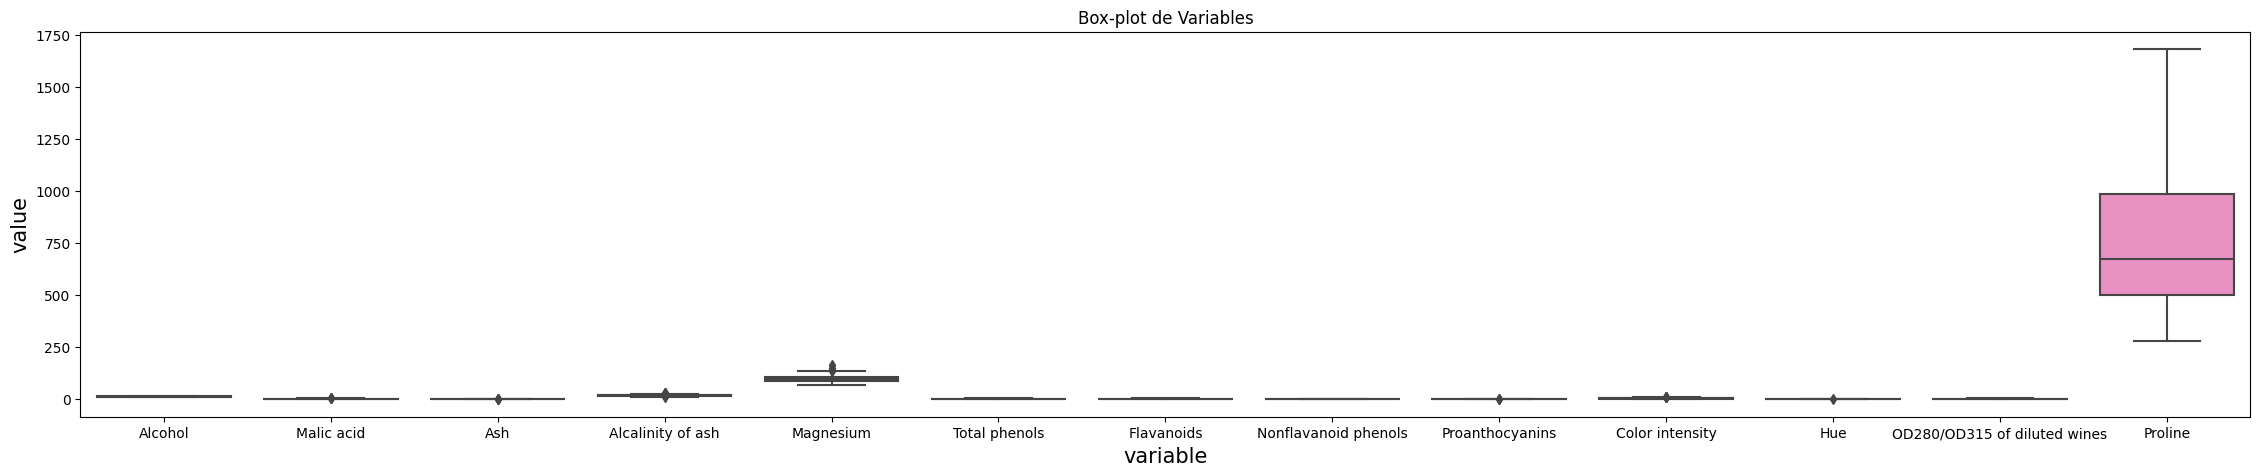

In [84]:
# Busca rangos en las variables y potenciales outliers
plt.figure(figsize=(28,5))
sns.boxplot(x='variable', y='value', data=pd.melt(df[cols_num])).set_title('Box-plot de Variables')

#### Insights:
- Como se puede ver en el boxplot, la variable Proline tiene un orden de magnitud muy diferente a la del resto de las variables. Mientras muchas de las variables poseen valores cercanos al cero, Proline va desde el 250 hasta 1500

## Feature Engineering
### Transformations

In [85]:
# Copy of original df for feature engineering
df2 = df.copy()

In [86]:
# Copy of original dataset for final labeling
df3 = df.copy()

In [87]:
# -----------------------------
# Eliminar columnas no necesarias - No hay existen columnas innecesarias
# Aplicar transformaciónes a las columnas (como log natural) para elimiar sesgos - Ninguna variable tiene un sesgo alto
# Aplicar cambios de tipo de variables (pasar a categoría, cambiar texto/true-false a 1/0) - No existen columnas con un tipo de dato incorrecto

In [88]:
# Pairplot
# Generates a Pearson correlation coefficient calculation for the pairplot

from scipy.stats import pearsonr

def reg_coef(x, y, label=None, color=None, **kwargs):
    ax = plt.gca()
    r, p = pearsonr(x, y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5, 0.5), xycoords = 'axes fraction', ha='center', fontsize=15)
    ax.set_axis_off()

Text(0.5, 0.98, 'Análisis de Correlación')

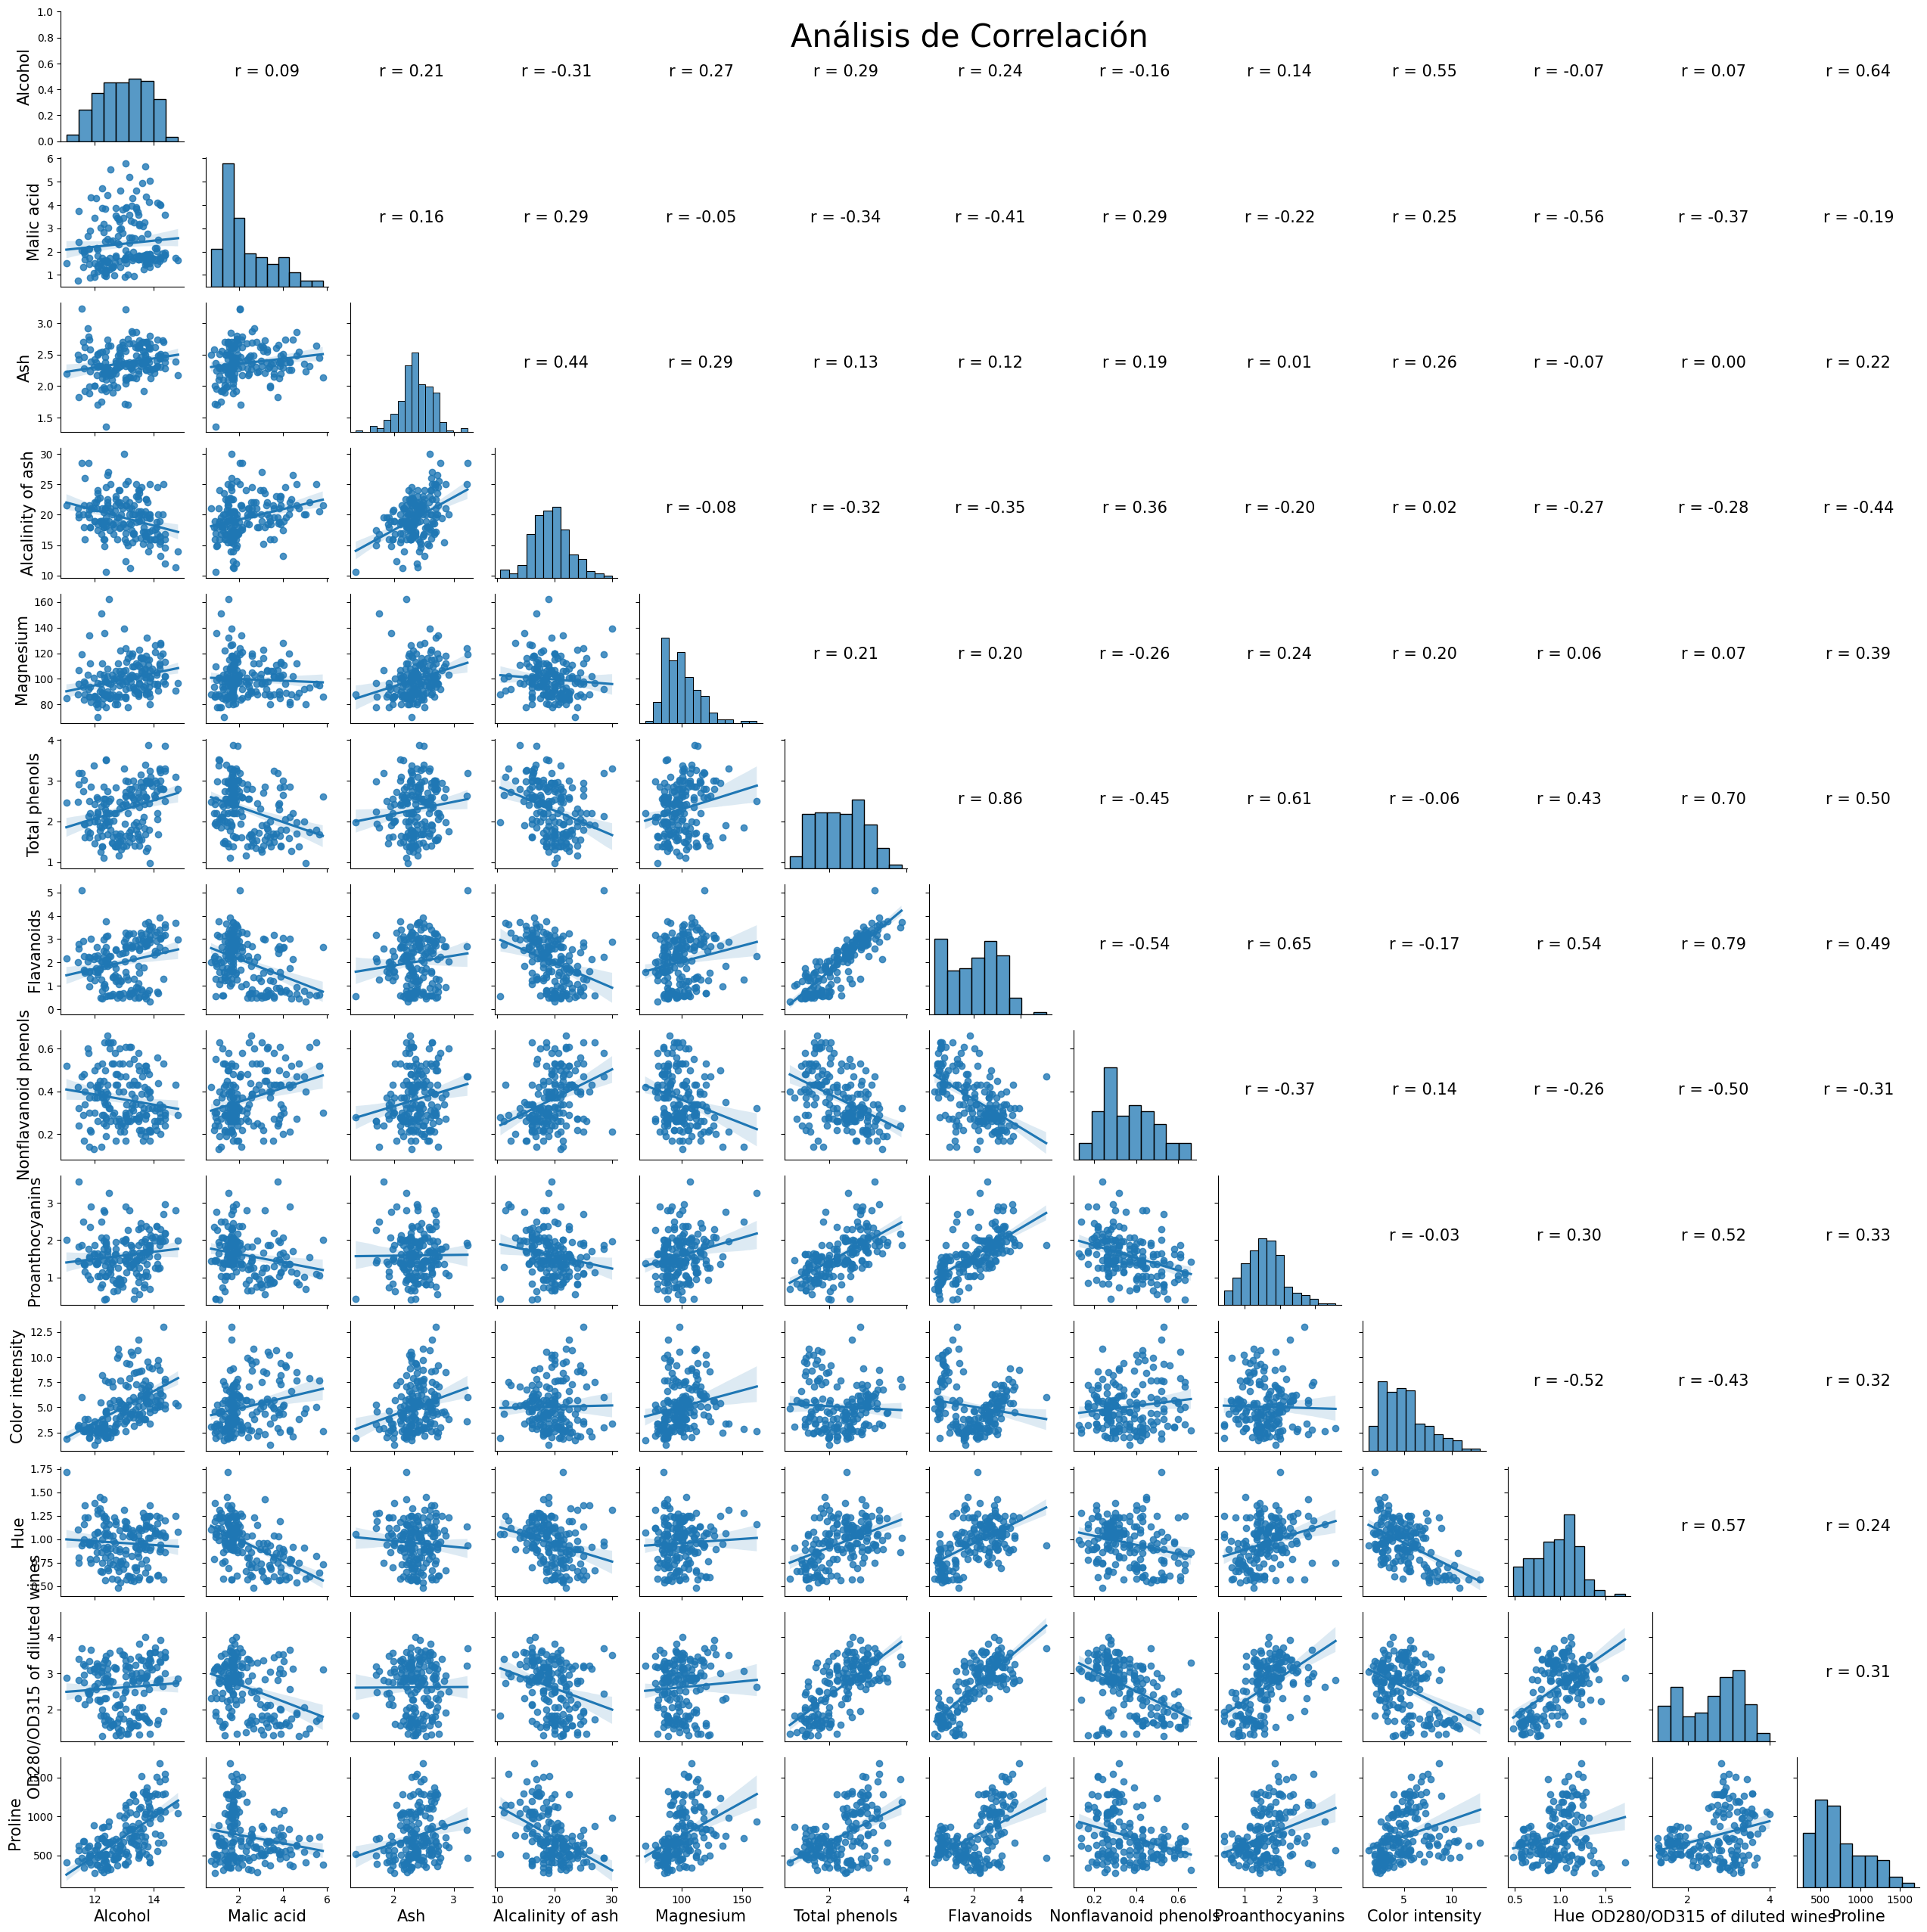

In [89]:
# Genera una matriz de correlación con solamente los gráficos en la parte inferior
# y los coeficientes de correlación en el triangulo superior
# En la diagonal se encuentran los gráficos de PDF para entender la distribución de la data

import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 15
g = sns.PairGrid(df2, height=2)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef, fontsize=20, cmap=plt.get_cmap('GnBu'))
g.fig.suptitle('Análisis de Correlación', fontsize=30)

In [90]:
# ----------------
# Escalamiento
# -----------------
# Para cambiar todas las distrubciones (que se asumen como normales) a una escala del Z score
from scipy.stats import zscore

df2 = df2.apply(zscore)

In [91]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,-8.382808e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
Malic acid,178.0,-1.197544e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
Ash,178.0,-8.370333e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
Alcalinity of ash,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
Magnesium,178.0,-3.991813e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
Total phenols,178.0,0.000000e+00,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
Flavanoids,178.0,-3.991813e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
Nonflavanoid phenols,178.0,3.592632e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
Proanthocyanins,178.0,-1.197544e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
Color intensity,178.0,2.494883e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


**Main Transformations**
1. Log transformation - No necesario
2. Column dropping - No necesario
3. Escalamiento

---
## Modelo de Clustering K-Means

Text(0.5, 1.0, 'Resultados KMeans')

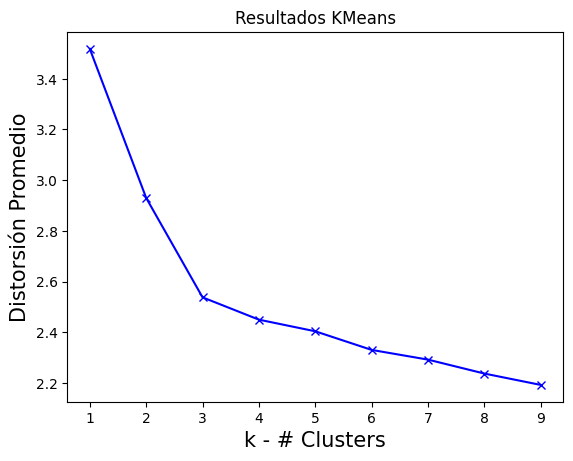

In [92]:
# Buscando el óptimo número de cluseters
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(df2)
    prediction = model.predict(df2)

    # Generates the average distortion calculation for each one of the cluster points
    # Compares each data point with the cluster centers and obtains the minimum and divides it for my data
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])

# Plot the Scree Graphic (Diagrama de Scree)
# Distortion decreases as the number of clusters increas, until the number of clusters = number of points
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Distorsión Promedio')
plt.title('Resultados KMeans')

#### Insights:
- Por inspección visual, un número de 3 clusters parece el indicado, y donde se forma el codo en el gráfico
- Se hizo un análisis entre 1 y 9 clusters

In [93]:
# Se genera el número de clusters = 3
# El parámetro n_initi significa que se probarán con 15 diferentes inicializaciones y se tomarán las mejores
kmeans = KMeans(n_clusters=3, n_init=15, random_state=1)
kmeans.fit(df2)

KMeans(n_clusters=3, n_init=15, random_state=1)

In [94]:
# Se pueden ver las coordenadas de los centroides para cluster
centroids = kmeans.cluster_centers_
centroids

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [95]:
centroid_df = pd.DataFrame(centroids, columns=list(df2))
centroid_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


In [96]:
# Se genera un dataframe para los labels de los clusters y se convierte en categorías
# Así, cada registro tiene su cluster asociado

# Aquí construyo un dataframe con la predicción de a qué grupo corresponde cada observación
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_labels.value_counts()

labels
0         65
2         62
1         51
dtype: int64

In [97]:
df_labels

,labels
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [103]:
# Aquí se une la predicción del bloque anterior con el registro en sí
df_labeled = df3.reset_index().join(other=df_labels, how='left')
df_labeled['labels'].value_counts()


0    65
2    62
1    51
Name: labels, dtype: int64

In [104]:
# División de los clusters
# Número de registros con cada uno de los clusters 
df_labeled['labels'].value_counts()

0    65
2    62
1    51
Name: labels, dtype: int64

<AxesSubplot: >

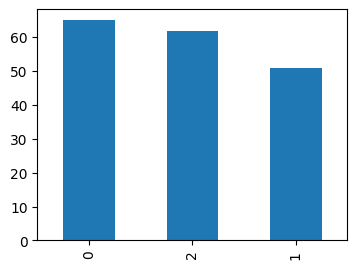

In [105]:
# Gráfico de clusers por registro
fig, ax = plt.subplots(1,1, figsize=(4,3))
pd.value_counts(df_labeled['labels']).plot(kind='bar')

In [117]:
df_labeled

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [118]:
df_labeled.drop(columns='index', inplace=True)
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Alcohol                       178 non-null    float64 
 1   Malic acid                    178 non-null    float64 
 2   Ash                           178 non-null    float64 
 3   Alcalinity of ash             178 non-null    float64 
 4   Magnesium                     178 non-null    int64   
 5   Total phenols                 178 non-null    float64 
 6   Flavanoids                    178 non-null    float64 
 7   Nonflavanoid phenols          178 non-null    float64 
 8   Proanthocyanins               178 non-null    float64 
 9   Color intensity               178 non-null    float64 
 10  Hue                           178 non-null    float64 
 11  OD280/OD315 of diluted wines  178 non-null    float64 
 12  Proline                       178 non-null    int6

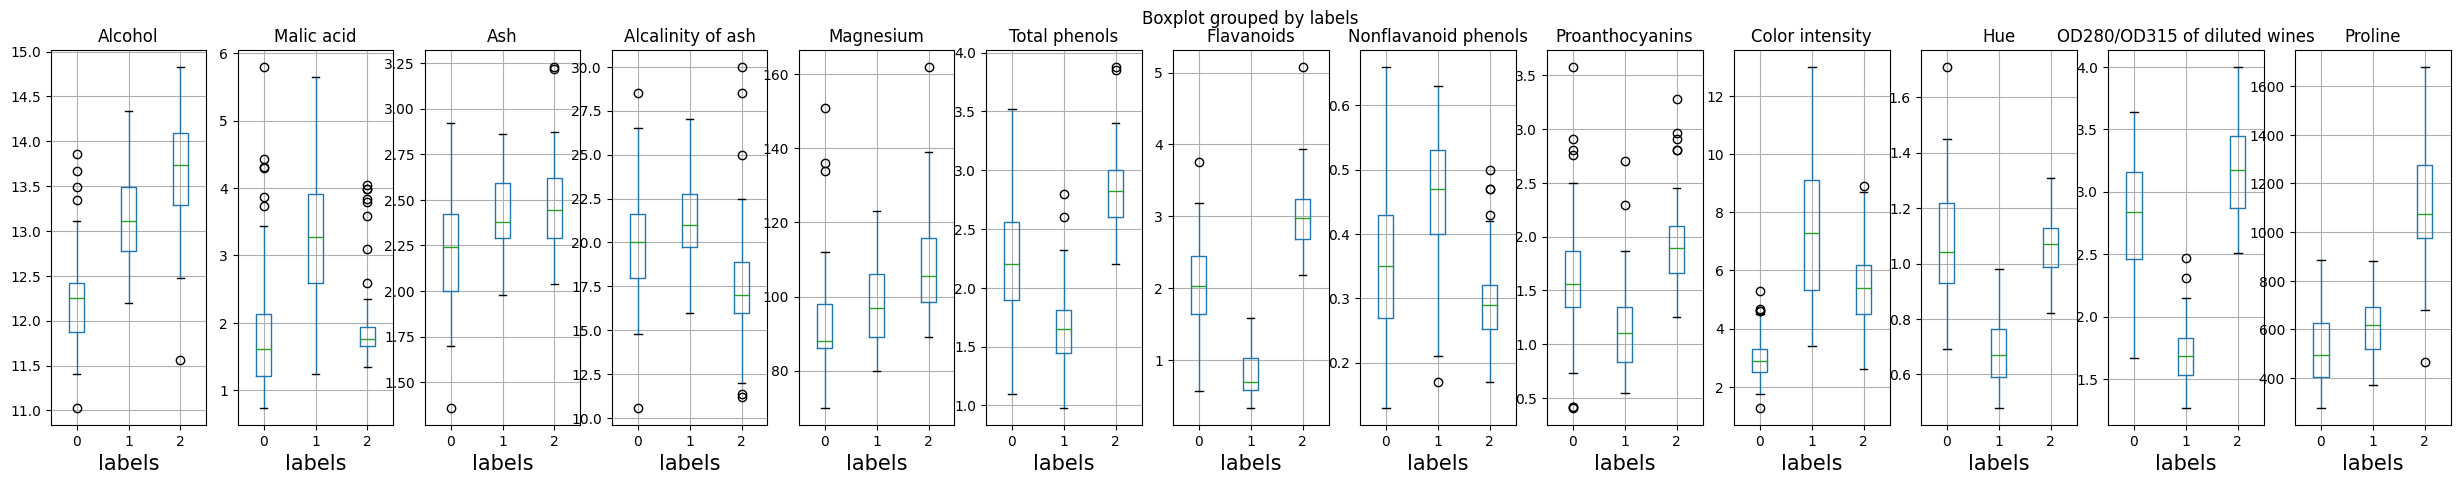

In [123]:
# Gráfico de clases
fig, ax = plt.subplots(1, 13, figsize=(30,5))
fig.suptitle('Configuración de clusters por Variable (Kmeans)')
for i, col in enumerate(df_labeled.columns):
    if i<13:        # Limitar para que graficar la parte columna de lables puesto que esta ya está siendo usada para el eje x de los boxplots
        df_labeled.boxplot(col, 'labels', ax=ax[i])

#### Insights:
- Las gráficas anteriores nos sirven para perfilar. Esto genera un patrón que describe al cluster. 
- El clustering segrega a los diferentes grupos de datos en algunos rangos de algunas variables, que se pueden revisar
- Por ejemplo, el cluster 0 se caracteriza por tener menos alcohol, un bajo nivel de ácido málico, un nivel medio de phenoles, etc
- En cambio el cluster 1 es intermedio en muchas variables: alcoho, ácido, ash, magnesio, etc.

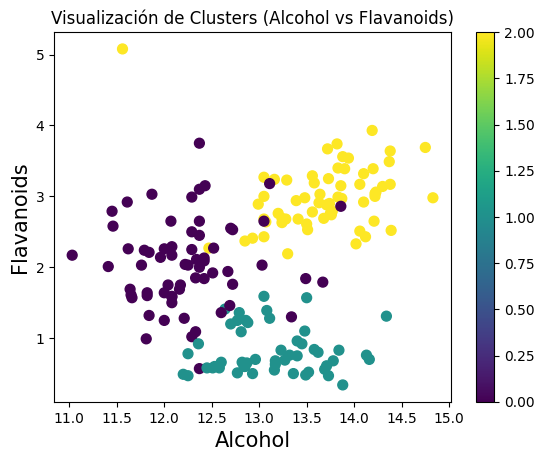

In [127]:
# Gráfico de clusters
# Se escogen dos variables que tengan mucha diferentecia entre los mismos (Alcohol y Flavanoids)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Alcohol'], df_labeled['Flavanoids'], c=df_labeled['labels'], s=50)
ax.set_title('Visualización de Clusters (Alcohol vs Flavanoids)')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Flavanoids')
plt.colorbar(scatter)


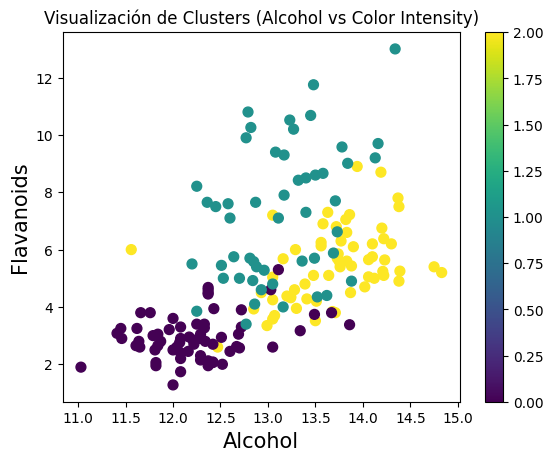

In [130]:
# Gráfico de clusters
# Se escogen dos variables que tengan mucha diferentecia entre los mismos (Alcohol y Flavanoids)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['Alcohol'], df_labeled['Color intensity'], c=df_labeled['labels'], s=50)
ax.set_title('Visualización de Clusters (Alcohol vs Color Intensity)')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Flavanoids')
plt.colorbar(scatter)

#### Insights
- Se puede ver claramente cómo se arman los clusters más intnsamente divididos en los grupos que tienen mayor en los grupos que tienen mayor varianza o división entre sus columnas
---
## Bonus Track
### Hierarchichal Clustering
- Se ejecuta un método llamado clustering Jerárquico, que divide en un "dendograma" a los datos
- Además se genera el concepto del índice cofenético, para ver cuál es el óptimo número de clusters
#### Usando Ward + Distancia Euclidiana

In [132]:
# Se genera la matriz de enlaces
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df2, 'average', metric='euclidean')
z.shape

(177, 4)

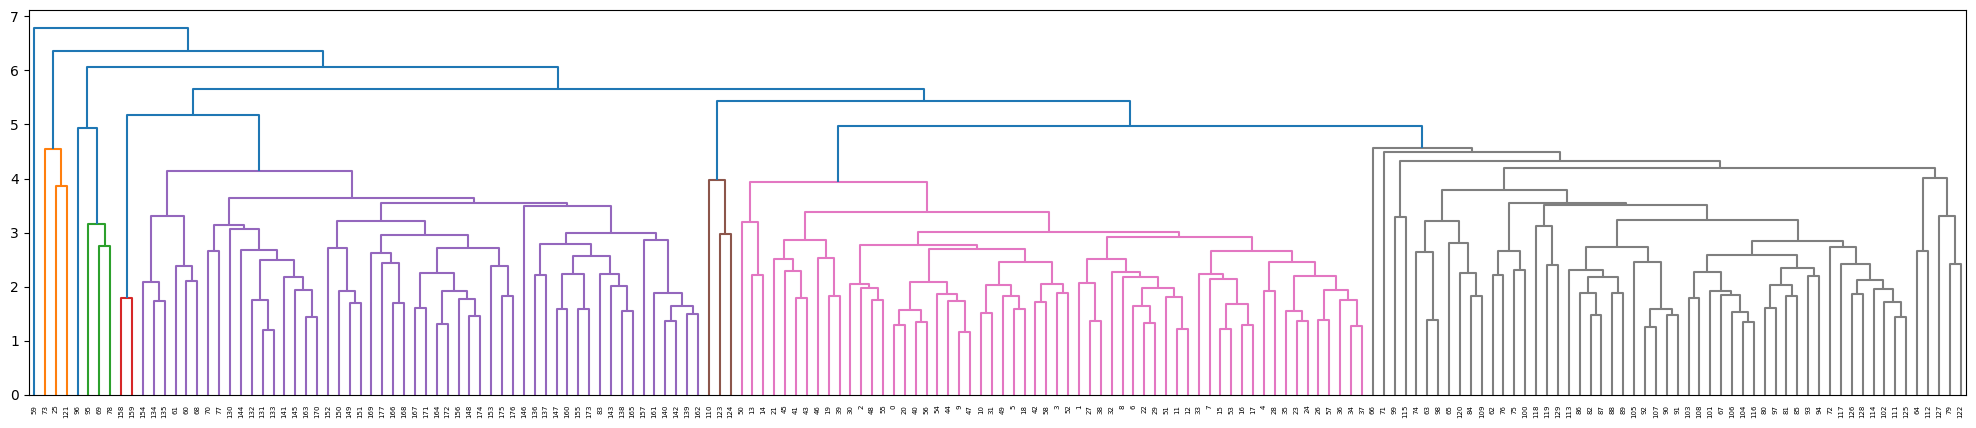

In [134]:
# Generate Dendogram
plt.figure(figsize=(25,5))
dendrogram(z)
plt.show()

In [136]:
# Se calcula el coeficiente cofenético para validar la calidad de del fit del dendograma con los pares de datos sin ordenar
# https://en.wikipedia.org/wiki/Cophenetic_correlation
# El máximo del coeficiente es 1
c, coph_dists = cophenet(z, pdist(df2))
print('Cophenetic Coefficient: ', format(c, '.4f'))


Cophenetic Coefficient:  0.7591


---
## Silhouette Score
- Se calcula el Silhouette Score para el modelo
- Se prueba este score con un rango de 2 a 10 clusters, buscando el número de clusters donde se produzca el peak del score
- Este peak indica cuál es el óptimo número de clusters
- https://en.wikipedia.org/wiki/Silhouette_(clustering)
- El gráfico muestra qué tan consistentes son los clusters

In [137]:
# Genera un dataframe para el resultado
sil_df = pd.DataFrame({}, columns=['Model', 'n_clusters', 'score'], index=None)

In [145]:
from sklearn.metrics import silhouette_score

# Resultado de KMeans de 2 a 10 clusters
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=1, n_init='auto')
    preds = clusterer.fit_predict(df2)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df2, clusterer.labels_, metric='euclidean')
    # Adds result to sil_df results table
    pd.concat((sil_df, pd.DataFrame(['KMeans', n_clusters, score])), axis=0)
    # sil_df = sil_df.append({'Model': 'KMeans', 'n_clusters':n_clusters, 'score':score}, ignore_index=True)

Text(0.5, 1.0, 'Silhouette Score')

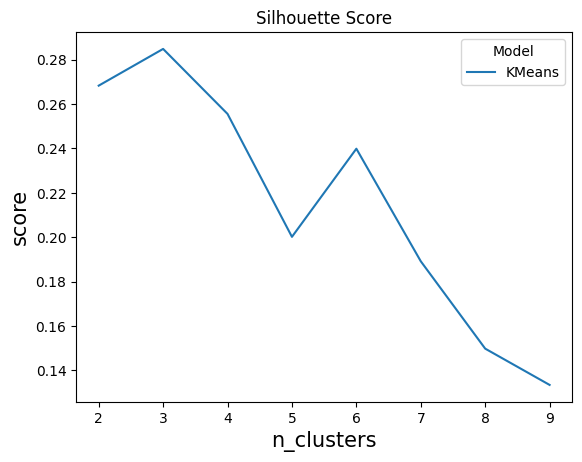

In [147]:
sns.lineplot(data=sil_df, x='n_clusters', y='score', hue='Model', style='Model').set_title('Silhouette Score')

#### Insights:
- Se confirma con el Silhoutte Score que el k=3 se tiene el mejor desempeño

#### Wrap up:
- Clustering - KMeans
- EDA y Análisis Univariado
- Correlación y análisis bivariado
- Feature Engineering
- Algoritmo
- Resultados Visuales
    - Gráfico de codo (para determinar el mejor número de clusters)
    - Gráfico de Patrón (multiples boxplots)
    - Gráfico de Clusters (scatterplots entre dos variables)
    - Gráfico de silueta (para confirmar el mejor número de clusters ya con un score)
- Dendograma
- Silhouette Score